In [1]:
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
import pandas as pd
from bs4 import BeautifulSoup as bs
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.action_chains import ActionChains
import time
from tqdm import tqdm_notebook as tqdm
import requests as req
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 17, 8
rcParams['font.family'] ='malgun Gothic' #AppleGothic

In [2]:
#네스프레소.csv파일 가져오기
nes = pd.read_csv("네스프레소.csv", encoding = 'utf-8')
#nes['Star'] = nes['Star'].str.extract(r'(\d+.\d+)')
nes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2090 entries, 0 to 2089
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  2090 non-null   int64  
 1   Star        2090 non-null   float64
 2   Date        2090 non-null   object 
 3   Style       2090 non-null   object 
 4   Color       2090 non-null   object 
 5   Review      2083 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 98.1+ KB


In [3]:
homecafe = nes['Style'].str.split("색상:", expand = True)
homecafe[0] = homecafe[0].str.replace("스타일: ", "")
homecafe.rename(columns={0: "Style", 1: "Color"}, inplace=True)
homecafe

Style
0     머신 + 에어로
1        기계 전용
2        기계 전용
3     머신 + 에어로
4        기계 전용
...        ...
2085     기계 전용
2086  머신 + 에어로
2087     기계 전용
2088     기계 전용
2089  머신 + 에어로

[2090 rows x 1 columns]

In [4]:
ymd = nes['Date'].str.replace("Reviewed in the United States 🇺🇸 on ", "")
ymd = ymd.str.replace("년 ", "-")
ymd = ymd.str.replace("월 ", "-")
ymd = ymd.str.replace("일", "")
ymdf = pd.to_datetime(ymd)
ymdf

0      2017-12-15
1      2018-11-28
2      2018-12-10
3      2022-09-15
4      2022-09-24
          ...    
2085   2018-01-14
2086   2021-12-28
2087   2017-12-11
2088   2017-12-15
2089   2018-11-28
Name: Date, Length: 2090, dtype: datetime64[ns]

In [ ]:
# homecafe['Star'] = cafe1['Star']
# homecafe = homecafe[['Star','Style','Color']]
# homecafe['Review'] = cafe1['Review']

In [5]:
homecafe['Date'] = ymdf
homecafe

Style       Date
0     머신 + 에어로 2017-12-15
1        기계 전용 2018-11-28
2        기계 전용 2018-12-10
3     머신 + 에어로 2022-09-15
4        기계 전용 2022-09-24
...        ...        ...
2085     기계 전용 2018-01-14
2086  머신 + 에어로 2021-12-28
2087     기계 전용 2017-12-11
2088     기계 전용 2017-12-15
2089  머신 + 에어로 2018-11-28

[2090 rows x 2 columns]

In [ ]:
# homecafe = homecafe[['Star','Date','Style','Color','Review']]
# homecafe

In [6]:
homecafe = pd.DataFrame(homecafe)

In [7]:
# homecafe = homecafe.astype({'Star':'float'})
# homecafe

In [8]:
homecafe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2090 entries, 0 to 2089
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Style   2090 non-null   object        
 1   Date    2090 non-null   datetime64[ns]
dtypes: datetime64[ns](1), object(1)
memory usage: 32.8+ KB


In [ ]:
# print(homecafe.Style.unique())
# print(homecafe.Color.unique())

In [ ]:
#옵션별 리뷰 갯수
style1 = homecafe['Style'].value_counts()
style1

기계 전용                 1192
머신 + 에어로               852
기계 + 캡슐 세트              18
기계 + 에어로치노 + 캡슐 세트      15
기계 + 캡슐 VertuoLine       8
머신 + 에어로치노               5
Name: Style, dtype: int64

In [ ]:
y1 = style1[['기계 전용','머신 + 에어로','기계 + 캡슐 세트','기계 + 에어로치노 + 캡슐 세트','기계 + 캡슐 VertuoLine','머신 + 에어로치노'
]]
y1

기계 전용                 1192
머신 + 에어로               852
기계 + 캡슐 세트              18
기계 + 에어로치노 + 캡슐 세트      15
기계 + 캡슐 VertuoLine       8
머신 + 에어로치노               5
Name: Style, dtype: int64

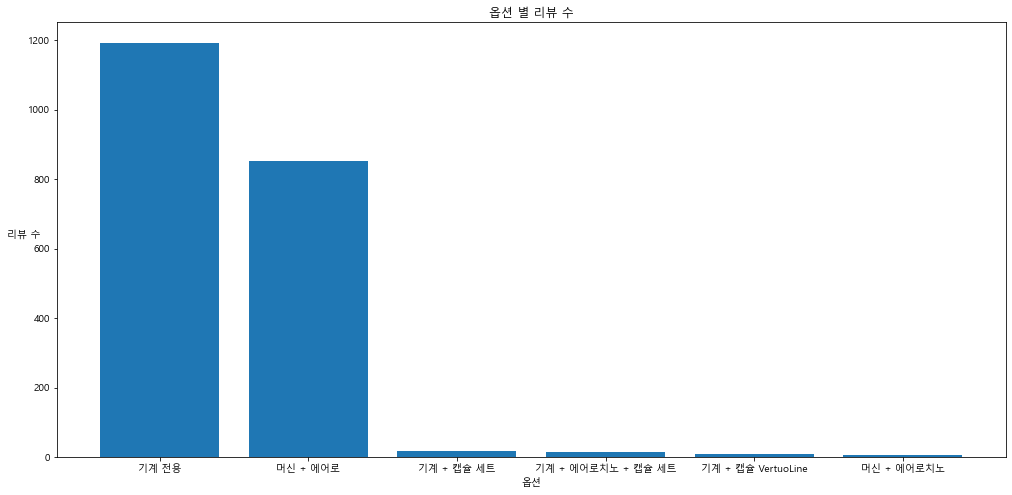

In [ ]:
x = y1.index
plt.bar(x,y1)
plt.title('옵션 별 리뷰 수')
plt.xlabel('옵션')
plt.ylabel('리뷰 수').set_rotation(0)
plt.show()

In [ ]:
#색상별 리뷰 갯수
color1 = homecafe['Color'].value_counts()
color1

 그레이         1106
 블랙           440
 레드           238
 타이탄.         236
 LE 블랙 매트      54
 잉크 블랙.        11
 매트 블랙.         5
Name: Color, dtype: int64

In [ ]:
#별점별 리뷰 갯수
star1 = homecafe['Star'].value_counts()
star1

5.0    1250
1.0     438
4.0     142
2.0     132
3.0     128
Name: Star, dtype: int64

In [ ]:
y = star1[[1.0,2.0,3.0,4.0,5.0]]
y

1.0     438
2.0     132
3.0     128
4.0     142
5.0    1250
Name: Star, dtype: int64

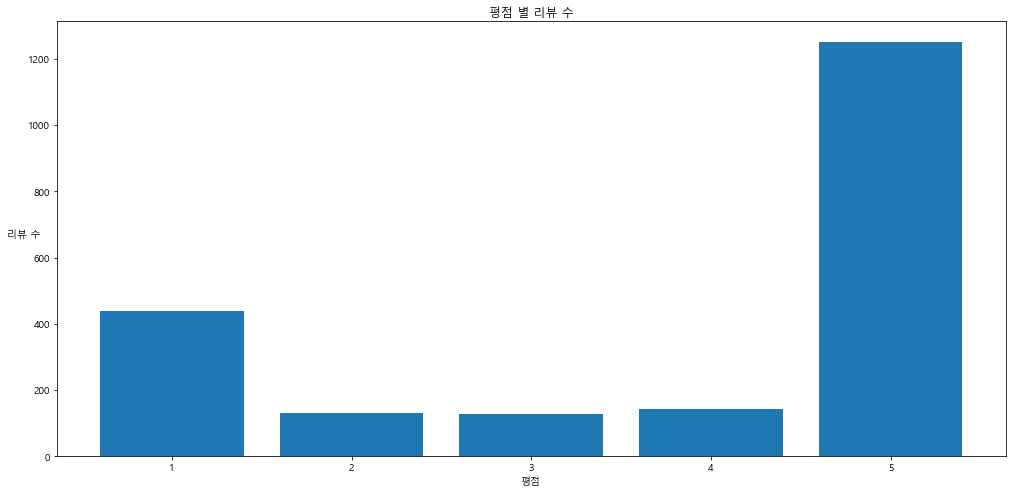

In [ ]:
x = y.index
plt.bar(x,y)
plt.title('평점 별 리뷰 수')
plt.xlabel('평점')
plt.ylabel('리뷰 수').set_rotation(0)
plt.show()

In [ ]:
#년도별로 쪼개기
homecafe['year'] = homecafe['Date'].dt.year
homecafe['month'] = homecafe['Date'].dt.month
homecafe['day'] = homecafe['Date'].dt.day

In [ ]:
homecafe

Star       Date     Style  Color  \
0      5.0 2017-12-15  머신 + 에어로    그레이   
1      5.0 2018-11-28     기계 전용     블랙   
2      5.0 2018-12-10     기계 전용    그레이   
3      5.0 2022-09-15  머신 + 에어로   타이탄.   
4      5.0 2022-09-24     기계 전용     블랙   
...    ...        ...       ...    ...   
2085   5.0 2018-01-14     기계 전용    그레이   
2086   4.0 2021-12-28  머신 + 에어로    그레이   
2087   5.0 2017-12-11     기계 전용     레드   
2088   5.0 2017-12-15     기계 전용     블랙   
2089   5.0 2018-11-28  머신 + 에어로    그레이   

                                                 Review  year  month  day  
0     "Is this a good coffee maker?" Well, that's go...  2017     12   15  
1     We have used this machine daily since purchase...  2018     11   28  
2     The inside box that the machine came in had be...  2018     12   10  
3     I’m loving this machine! I’ve had many differe...  2022      9   15  
4     This is the best purchase! My fiancé and I use...  2022      9   24  
...                                                 ...   ...    ...  ...  
2085                                    SO MUCH FLAVOR.  2018      1   14  
2086  I've only had my Nespresso machine for a short...  2021     12   28  
2087                                   Nice and elegant  2017     12   11  
2088  This machine has changed the way I do mornings...  2017     12   15  
2089  I have waited forever to pull the trigger on t...  2018     11   28  

[2090 rows x 8 columns]

In [ ]:
year = homecafe['year'].value_counts()
year

2020    441
2019    389
2021    357
2018    351
2022    298
2017    254
Name: year, dtype: int64

In [ ]:
# month= homecafe['month'].value_counts()
# month

In [ ]:
y2 = year[[2017,2018,2019,2020,2021,2022]]
y2

2017    254
2018    351
2019    389
2020    441
2021    357
2022    298
Name: year, dtype: int64

In [ ]:
#년도별 별점 
#year2=homecafe.groupby('year').sum()[['star']]
#year2

Star  month   day
year                     
2017   905.0   2852  3894
2018  1280.0   3155  7822
2019  1418.0   2276  6085
2020  1661.0   2577  7077
2021  1364.0   2055  5503
2022  1276.0   1499  4637

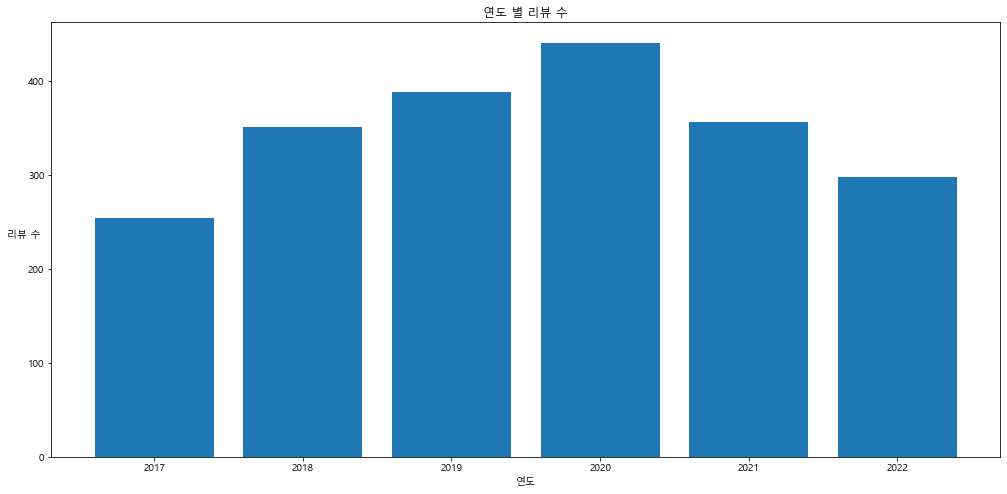

In [ ]:
x = y2.index
plt.bar(y2,x)
plt.title('연도 별 리뷰 수')
plt.xlabel('연도')
plt.ylabel('리뷰 수').set_rotation(0)
plt.show()

In [ ]:
#캡슐.csv파일 가져오기
capsule = pd.read_csv("네스프레소캡슐.csv", encoding = 'utf-8')
capsule

Unnamed: 0  Star        Date     Style  \
0              0   5.0  2018-08-07  베스트 셀러 팩   
1              1   5.0  2020-01-30  베스트 셀러 팩   
2              2   5.0  2022-09-23  베스트 셀러 팩   
3              3   5.0  2022-09-16  베스트 셀러 팩   
4              4   5.0  2022-09-14  베스트 셀러 팩   
...          ...   ...         ...       ...   
2477        2477   5.0  2021-06-28  베스트 셀러 팩   
2478        2478   5.0  2021-12-21  베스트 셀러 팩   
2479        2479   5.0  2020-04-19  베스트 셀러 팩   
2480        2480   5.0  2017-08-23  베스트 셀러 팩   
2481        2481   5.0  2021-08-11  베스트 셀러 팩   

                                                 Review  
0     I really enjoy this coffee , but, there is not...  
1     You need something quick and to start your day...  
2     It's usually not the freshness I have to worry...  
3     I love a cup of Nespresso. I like coffee but N...  
4     I love that I can quickly make a delicious cup...  
...                                                 ...  
2477                                 I like the product  
2478  While I like these capsules and I love my nesp...  
2479                                       Good product  
2480                          arrived in good condition  
2481  Read some reviews that pods were smashed when ...  

[2482 rows x 5 columns]

In [ ]:
capsule.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2482 entries, 0 to 2481
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Unnamed: 0  2482 non-null   int64         
 1   Star        2482 non-null   float64       
 2   Date        2482 non-null   datetime64[ns]
 3   Style       2482 non-null   object        
 4   Review      2474 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 97.1+ KB


In [ ]:
capsule = capsule.astype({'Date':'datetime64[ns]'})

In [ ]:
cap= capsule.drop(['Unnamed: 0'],axis = 1)
cap

Star       Date     Style  \
0      5.0 2018-08-07  베스트 셀러 팩   
1      5.0 2020-01-30  베스트 셀러 팩   
2      5.0 2022-09-23  베스트 셀러 팩   
3      5.0 2022-09-16  베스트 셀러 팩   
4      5.0 2022-09-14  베스트 셀러 팩   
...    ...        ...       ...   
2477   5.0 2021-06-28  베스트 셀러 팩   
2478   5.0 2021-12-21  베스트 셀러 팩   
2479   5.0 2020-04-19  베스트 셀러 팩   
2480   5.0 2017-08-23  베스트 셀러 팩   
2481   5.0 2021-08-11  베스트 셀러 팩   

                                                 Review  
0     I really enjoy this coffee , but, there is not...  
1     You need something quick and to start your day...  
2     It's usually not the freshness I have to worry...  
3     I love a cup of Nespresso. I like coffee but N...  
4     I love that I can quickly make a delicious cup...  
...                                                 ...  
2477                                 I like the product  
2478  While I like these capsules and I love my nesp...  
2479                                       Good product  
2480                          arrived in good condition  
2481  Read some reviews that pods were smashed when ...  

[2482 rows x 4 columns]

In [ ]:
#년도별로 쪼개기
capsule['year'] = capsule['Date'].dt.year
capsule['month'] = capsule['Date'].dt.month
capsule['day'] = capsule['Date'].dt.day

In [ ]:
capsule

Unnamed: 0  Star       Date     Style  \
0              0   5.0 2018-08-07  베스트 셀러 팩   
1              1   5.0 2020-01-30  베스트 셀러 팩   
2              2   5.0 2022-09-23  베스트 셀러 팩   
3              3   5.0 2022-09-16  베스트 셀러 팩   
4              4   5.0 2022-09-14  베스트 셀러 팩   
...          ...   ...        ...       ...   
2477        2477   5.0 2021-06-28  베스트 셀러 팩   
2478        2478   5.0 2021-12-21  베스트 셀러 팩   
2479        2479   5.0 2020-04-19  베스트 셀러 팩   
2480        2480   5.0 2017-08-23  베스트 셀러 팩   
2481        2481   5.0 2021-08-11  베스트 셀러 팩   

                                                 Review  year  month  day  
0     I really enjoy this coffee , but, there is not...  2018      8    7  
1     You need something quick and to start your day...  2020      1   30  
2     It's usually not the freshness I have to worry...  2022      9   23  
3     I love a cup of Nespresso. I like coffee but N...  2022      9   16  
4     I love that I can quickly make a delicious cup...  2022      9   14  
...                                                 ...   ...    ...  ...  
2477                                 I like the product  2021      6   28  
2478  While I like these capsules and I love my nesp...  2021     12   21  
2479                                       Good product  2020      4   19  
2480                          arrived in good condition  2017      8   23  
2481  Read some reviews that pods were smashed when ...  2021      8   11  

[2482 rows x 8 columns]

In [ ]:
year = capsule['year'].value_counts()
year

2020    734
2019    441
2018    437
2021    418
2022    364
2017     88
Name: year, dtype: int64

In [ ]:
y2 = year[[2017,2018,2019,2020,2021,2022]]
y2

2017     88
2018    437
2019    441
2020    734
2021    418
2022    364
Name: year, dtype: int64

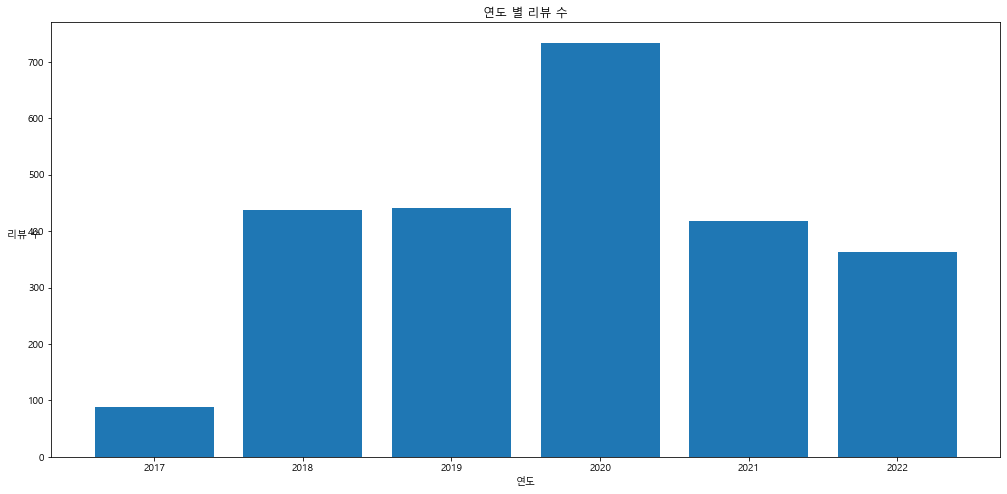

In [ ]:
x = y2.index
plt.bar(x,y2)
plt.title('연도 별 리뷰 수')
plt.xlabel('연도')
plt.ylabel('리뷰 수').set_rotation(0)
plt.show()

#### 상관관계 분석

In [ ]:
#trend.csv파일 가져오기
trend = pd.read_csv("trend.csv", encoding = 'utf-8')
trend

date    corona   capsule   machine
0     2018-01-01   0.00760  14.94429  26.77910
1     2018-01-02   0.00909  16.51940  34.91785
2     2018-01-03   0.00825  17.71033  35.31166
3     2018-01-04   0.00927  16.90357  29.87390
4     2018-01-05   0.00900  14.25278  25.96364
...          ...       ...       ...       ...
1515  2022-02-24  10.66069  50.94122  51.58518
1516  2022-02-25   8.07788  42.91202  42.51163
1517  2022-02-26   6.00255  51.32539  38.14391
1518  2022-02-27   5.26656  50.94122  40.27208
1519  2022-02-28   7.29310  44.10295  40.72556

[1520 rows x 4 columns]

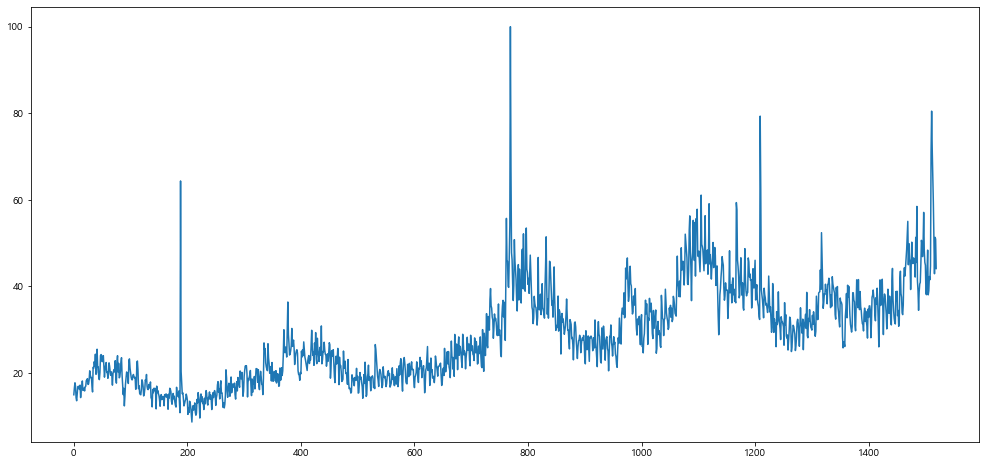

In [ ]:
plt.plot(trend["capsule"])

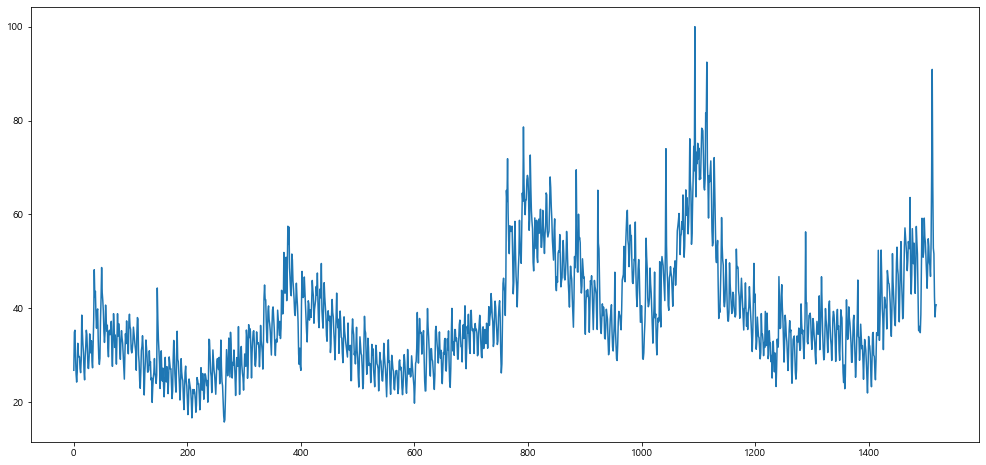

In [ ]:
plt.plot(trend["machine"])

In [ ]:
#상관관계
corr=trend.corr()
corr

corona   capsule   machine
corona   1.000000  0.484159  0.542067
capsule  0.484159  1.000000  0.743205
machine  0.542067  0.743205  1.000000

<AxesSubplot:>

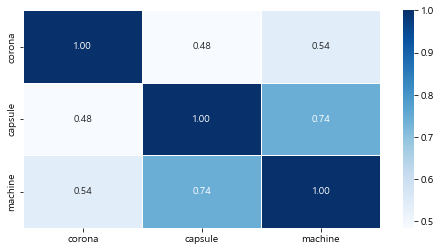

In [ ]:
plt.figure(figsize=(8,4))
sns.heatmap(data = trend.corr(), annot=True, fmt = '.2f', linewidths=.5, cmap='Blues')

In [ ]:
ban = pd.read_csv("반자동.csv", encoding = 'utf-8')
ban

Unnamed: 0  Star        Date                     Style  \
0              0   5.0  2018-01-27   Brushed Stainless Steel   
1              1   4.0  2017-06-16   Brushed Stainless Steel   
2              2   4.0  2018-01-27              Black Sesame   
3              3   5.0  2020-12-06   Brushed Stainless Steel   
4              4   5.0  2022-08-14   Brushed Stainless Steel   
...          ...   ...         ...                       ...   
4979        4979   5.0  2022-07-02   Brushed Stainless Steel   
4980        4980   5.0  2018-01-27   Brushed Stainless Steel   
4981        4981   5.0  2017-06-16   Brushed Stainless Steel   
4982        4982   5.0  2020-01-18   Brushed Stainless Steel   
4983        4983   5.0  2013-11-12              Black Sesame   

                                                 Review  
0     Despite some of the negative criticism sprinkl...  
1     This is the first espresso machine I've ever o...  
2     Okay so it takes me around 15 minutes but I cl...  
3     Update 9/19/2020-- The machine continues to ma...  
4     Update June 2nd 2019: Still use it daily, and ...  
...                                                 ...  
4979  If you’re a coffee person, you can’t go wrong ...  
4980  Play Video\n I wanted this for a long time. Wa...  
4981  Play Video\n I recommend this coffee machine, ...  
4982                                       Great so far  
4983  Bought this for my adult son. Loved it. Moved ...  

[4984 rows x 5 columns]

In [ ]:
ban = ban.astype({'Date':'datetime64[ns]'})

In [ ]:
auto= ban.drop(['Unnamed: 0'],axis = 1)
auto

Star       Date                     Style  \
0      5.0 2018-01-27   Brushed Stainless Steel   
1      4.0 2017-06-16   Brushed Stainless Steel   
2      4.0 2018-01-27              Black Sesame   
3      5.0 2020-12-06   Brushed Stainless Steel   
4      5.0 2022-08-14   Brushed Stainless Steel   
...    ...        ...                       ...   
4979   5.0 2022-07-02   Brushed Stainless Steel   
4980   5.0 2018-01-27   Brushed Stainless Steel   
4981   5.0 2017-06-16   Brushed Stainless Steel   
4982   5.0 2020-01-18   Brushed Stainless Steel   
4983   5.0 2013-11-12              Black Sesame   

                                                 Review  
0     Despite some of the negative criticism sprinkl...  
1     This is the first espresso machine I've ever o...  
2     Okay so it takes me around 15 minutes but I cl...  
3     Update 9/19/2020-- The machine continues to ma...  
4     Update June 2nd 2019: Still use it daily, and ...  
...                                                 ...  
4979  If you’re a coffee person, you can’t go wrong ...  
4980  Play Video\n I wanted this for a long time. Wa...  
4981  Play Video\n I recommend this coffee machine, ...  
4982                                       Great so far  
4983  Bought this for my adult son. Loved it. Moved ...  

[4984 rows x 4 columns]

In [ ]:
auto['year'] = auto['Date'].dt.year
auto['month'] = auto['Date'].dt.month
auto['day'] = auto['Date'].dt.day

In [ ]:
year = auto['year'].value_counts()
year

2020    919
2018    852
2017    768
2019    739
2021    690
2022    387
2016    266
2015    181
2014    140
2013     42
Name: year, dtype: int64

In [ ]:
y2 = year[[2013,2014,2015,2016,2017,2018,2019,2020,2021,2022]]
y2

(2013     42
 2014    140
 2015    181
 2016    266
 2017    768
 2018    852
 2019    739
 2020    919
 2021    690
 2022    387
 Name: year, dtype: int64,)

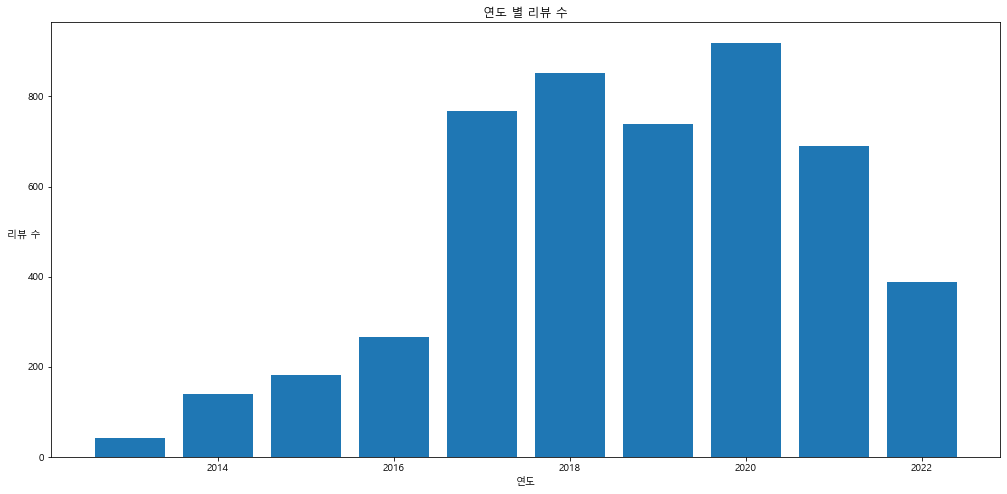

In [ ]:
x = y2.index
plt.bar(x,y2)
plt.title('연도 별 리뷰 수')
plt.xlabel('연도')
plt.ylabel('리뷰 수').set_rotation(0)
plt.show()

In [ ]:
dol = pd.read_csv("돌체.csv", encoding = 'utf-8')
dol

Unnamed: 0  Star        Date    Style  \
0             0   4.0  2022-09-16  Genio 2   
1             1   5.0  2021-01-03  Genio 2   
2             2   3.0  2022-09-16  Genio 2   
3             3   5.0  2022-09-22  Genio 2   
4             4   4.0  2021-01-03  Genio 2   
..          ...   ...         ...      ...   
576         576   5.0  2022-09-16  Genio 2   
577         577   5.0  2021-01-03  Genio 2   
578         578   5.0  2020-01-18  Genio 2   
579         579   5.0  2020-09-18  Genio 2   
580         580   5.0  2020-03-12  Genio 2   

                                                Review  
0    I used to own a Dolce gusto Circolo (beautiful...  
1    We had one of Dolce Gusto machines since 2012,...  
2    PROS\n- Doesn't take up much space\n- Easy to ...  
3    I already have an espresso machine, but bought...  
4    Trying desperately to ween myself off of expen...  
..                                                 ...  
576                                               Good  
577  This is the BEST espresso machine ever! I have...  
578                                            Love it  
579                                               Good  
580                                              Great  

[581 rows x 5 columns]

In [ ]:
dol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581 entries, 0 to 580
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  581 non-null    int64  
 1   Star        581 non-null    float64
 2   Date        581 non-null    object 
 3   Style       581 non-null    object 
 4   Review      576 non-null    object 
dtypes: float64(1), int64(1), object(3)
memory usage: 22.8+ KB


In [ ]:
dol = dol.astype({'Date':'datetime64[ns]'})
auto = auto.astype({'Date':'datetime64[ns]'})

In [ ]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581 entries, 0 to 580
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Star    581 non-null    float64
 1   Date    581 non-null    object 
 2   Style   581 non-null    object 
 3   Review  576 non-null    object 
dtypes: float64(1), object(3)
memory usage: 18.3+ KB


In [ ]:
auto = dol.drop(['Unnamed: 0'],axis = 1)
auto

Star        Date    Style  \
0     4.0  2022-09-16  Genio 2   
1     5.0  2021-01-03  Genio 2   
2     3.0  2022-09-16  Genio 2   
3     5.0  2022-09-22  Genio 2   
4     4.0  2021-01-03  Genio 2   
..    ...         ...      ...   
576   5.0  2022-09-16  Genio 2   
577   5.0  2021-01-03  Genio 2   
578   5.0  2020-01-18  Genio 2   
579   5.0  2020-09-18  Genio 2   
580   5.0  2020-03-12  Genio 2   

                                                Review  
0    I used to own a Dolce gusto Circolo (beautiful...  
1    We had one of Dolce Gusto machines since 2012,...  
2    PROS\n- Doesn't take up much space\n- Easy to ...  
3    I already have an espresso machine, but bought...  
4    Trying desperately to ween myself off of expen...  
..                                                 ...  
576                                               Good  
577  This is the BEST espresso machine ever! I have...  
578                                            Love it  
579                                               Good  
580                                              Great  

[581 rows x 4 columns]

In [ ]:
auto['year'] = auto['Date'].dt.year
auto['month'] = auto['Date'].dt.month
auto['day'] = auto['Date'].dt.day

In [ ]:
auto.index = auto['Date']#pd.to_datetime(auto.index,format='%Y년%m월')
auto.set_index([auto.index.year,auto.index.month],inplace=True)
auto.index.names=['년도','월']
auto

Star       Date    Style  \
년도   월                             
2022 9   4.0 2022-09-16  Genio 2   
2021 1   5.0 2021-01-03  Genio 2   
2022 9   3.0 2022-09-16  Genio 2   
     9   5.0 2022-09-22  Genio 2   
2021 1   4.0 2021-01-03  Genio 2   
...      ...        ...      ...   
2022 9   5.0 2022-09-16  Genio 2   
2021 1   5.0 2021-01-03  Genio 2   
2020 1   5.0 2020-01-18  Genio 2   
     9   5.0 2020-09-18  Genio 2   
     3   5.0 2020-03-12  Genio 2   

                                                   Review  year  month  day  
년도   월                                                                       
2022 9  I used to own a Dolce gusto Circolo (beautiful...  2022      9   16  
2021 1  We had one of Dolce Gusto machines since 2012,...  2021      1    3  
2022 9  PROS\n- Doesn't take up much space\n- Easy to ...  2022      9   16  
     9  I already have an espresso machine, but bought...  2022      9   22  
2021 1  Trying desperately to ween myself off of expen...  2021      1    3  
...                                                   ...   ...    ...  ...  
2022 9                                               Good  2022      9   16  
2021 1  This is the BEST espresso machine ever! I have...  2021      1    3  
2020 1                                            Love it  2020      1   18  
     9                                               Good  2020      9   18  
     3                                              Great  2020      3   12  

[581 rows x 7 columns]

In [ ]:
y = auto.groupby(['년도','월']).count()[['Review']]
y

Review
년도   월         
2019 9        4
     10      24
     11      12
     12      20
2020 1       19
     2       18
     3       10
     4        5
     5        3
     6        1
     7        9
     8       14
     9       11
     10      13
     11      14
     12      19
2021 1       69
     2       16
     3       28
     4        8
     5       11
     6       15
     7       17
     8        9
     9       14
     10      12
     11      15
     12      15
2022 1       18
     2       11
     3        9
     4       14
     5       13
     6        9
     7       12
     8        9
     9       56

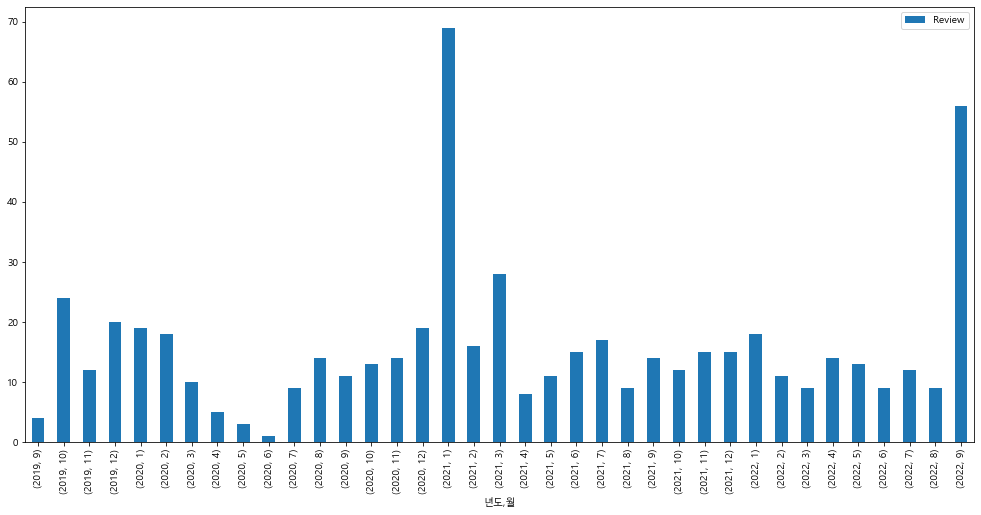

In [ ]:
y.plot(kind='bar')
plt.show()

In [ ]:
year = auto['year'].value_counts()
year

2021    231
2022    153
2020    137
2019     60
Name: year, dtype: int64

In [ ]:
y2 = year[[2019,2020,2021,2022]]
y2

2019     60
2020    137
2021    231
2022    153
Name: year, dtype: int64

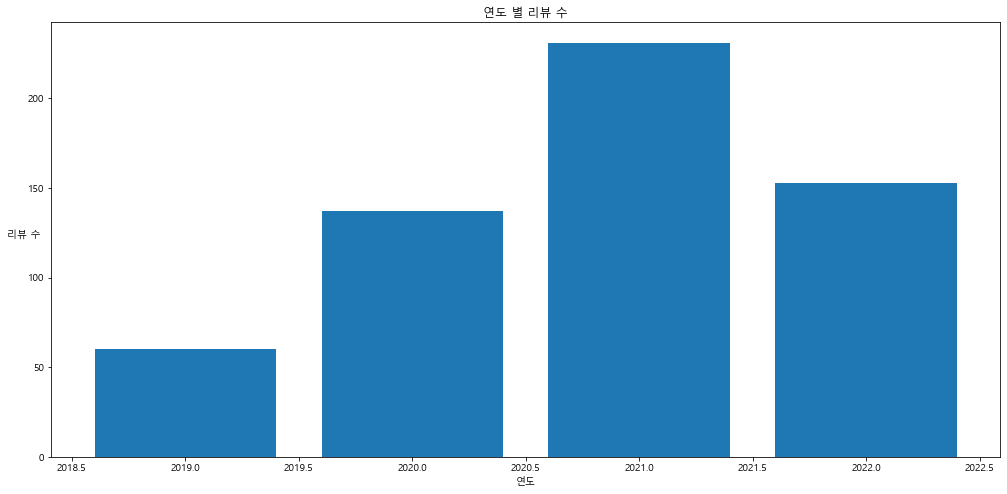

In [ ]:
x = y2.index
plt.bar(x,y2)
plt.title('연도 별 리뷰 수')
plt.xlabel('연도')
plt.ylabel('리뷰 수').set_rotation(0)
plt.show()